#### GRIP : The Spark Foundation

#### Tasak1 : Prediction Using Supervised Machine Learning

Simple Linear Regression with Python

#### Problem Statement : In this problem our task is to predict expected percent score of student based on no.of daily study hours

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# checking duplicate rows
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

## Outlier Detection

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

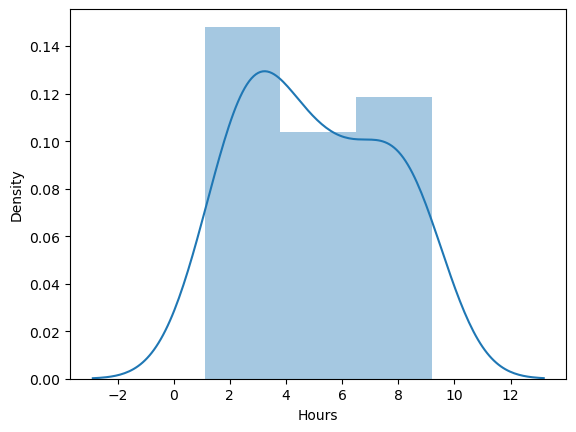

In [8]:
sns.distplot(data["Hours"])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

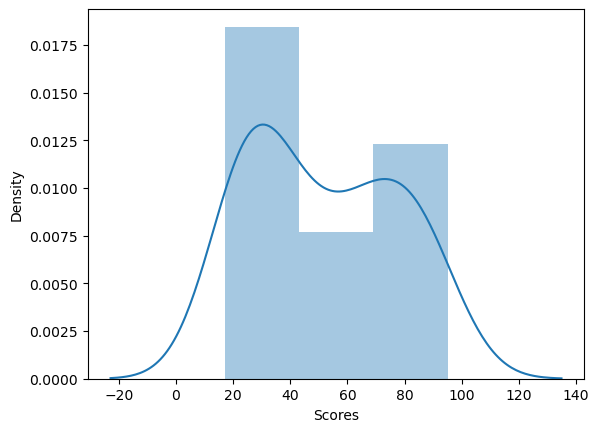

In [9]:
sns.distplot(data["Scores"])

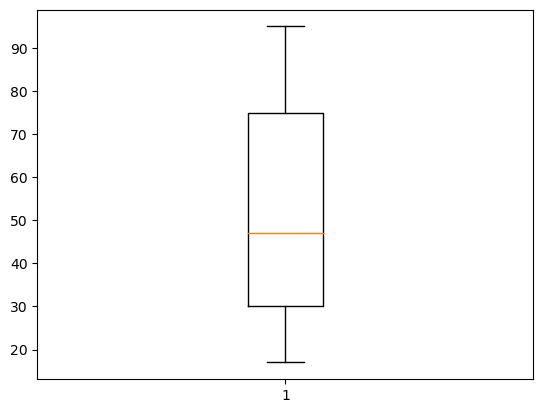

In [10]:
data1 = data['Scores']
plt.boxplot(data1)
plt.show()

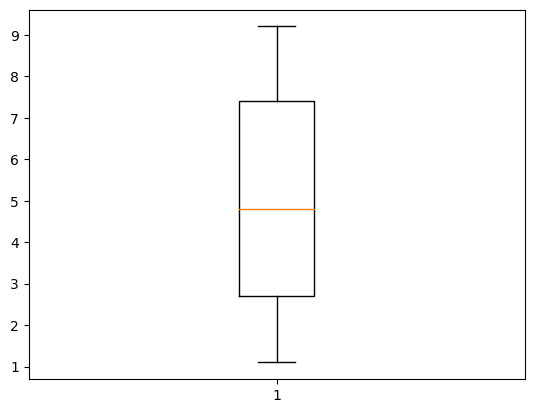

In [11]:
data1 = data['Hours']
plt.boxplot(data1)
plt.show()

## Building Model

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

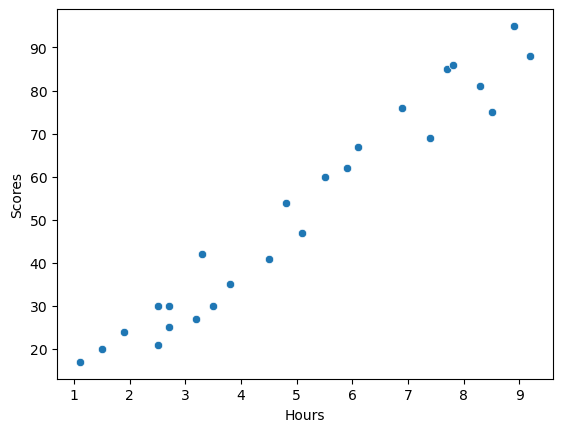

In [12]:
sns.scatterplot(x=data[ 'Hours'], y=data['Scores'])

## Correlation

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Fitting a Linear Regression Model

In [14]:
import statsmodels.formula.api as smf
model = smf.ols('Scores~Hours', data = data).fit()

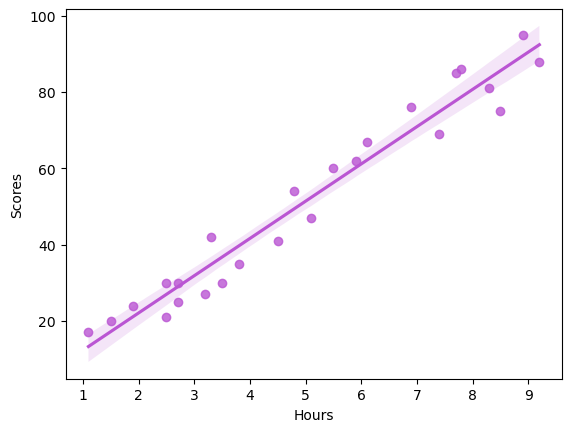

In [15]:
sns.regplot(x='Hours', y='Scores', data = data, color='mediumorchid');

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           9.13e-17
Time:                        19:38:48   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Coefficients
model.params

Intercept    2.483673
Hours        9.775803
dtype: float64

In [18]:
#Print t_values and p_values
print(model.tvalues)

Intercept     0.981044
Hours        21.582931
dtype: float64


In [19]:
#r_squared values
(model.rsquared, model.rsquared_adj)

(0.9529481969048356, 0.9509024663354806)

In [20]:
newdf = pd.Series([9.25])
newdf = pd.DataFrame(newdf,columns=['Hours'])
newdf

,Hours
0,9.25


In [21]:
model.predict(newdf)

0    92.909855
dtype: float64

In [22]:
model.mse_resid

31.394272292658105

In [23]:
np.sqrt(model.mse_resid)

5.603059190536729

# Conclusion

#### Accuracy of our model is 95.29%
#### Model predict that if a student studies for 9.25 hours per day then he/she will score is 92.90%